# GeoPandas

- GeoPandas Structure
- Working with GeoDataFrames and GeoSeriesf
- Carrying out project
- Basic spatial queries and attribute construction

In [1]:
import geopandas


/tmp/ipykernel_3120570/1616829109.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
gdf = geopandas.read_file("./data/shared/covid/gz_2010_us_040_00_500k.json")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [3]:
gdf.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  
0  MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1  MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2  MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3  POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4  POLYGON ((-114.05060 37.00040, -114.04999 36.9...

In [4]:
gdf.columns.values

array(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'],
      dtype=object)

<AxesSubplot:>

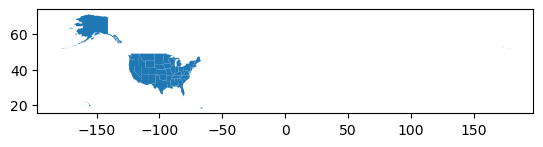

In [5]:
gdf.plot()

In [6]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

## Geometry

In [7]:
gdf.geometry

0     MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...
1     MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...
2     MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...
3     POLYGON ((-104.05770 44.99743, -104.25015 44.9...
4     POLYGON ((-114.05060 37.00040, -114.04999 36.9...
5     POLYGON ((-75.52684 39.65571, -75.52634 39.656...
6     MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...
7     MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...
8     MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...
9     POLYGON ((-75.41504 39.80179, -75.42804 39.809...
10    MULTIPOLYGON (((-71.28157 41.64821, -71.27817 ...
11    POLYGON ((-81.67754 36.58812, -81.68014 36.585...
12    MULTIPOLYGON (((-97.13436 27.89633, -97.13360 ...
13    POLYGON ((-114.05060 37.00040, -114.05175 37.0...
14    MULTIPOLYGON (((-123.09055 49.00198, -123.0353...
15    MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ...
16    MULTIPOLYGON (((-65.58733 18.38199, -65.59122 ...
17    MULTIPOLYGON (((-76.07147 38.20350, -76.04

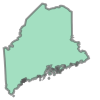

In [8]:
gdf.iloc[0].geometry

In [9]:
gdf.shape

(52, 6)

In [10]:
gdf.head(52)

GEO_ID STATE                  NAME LSAD  CENSUSAREA  \
0   0400000US23    23                 Maine        30842.923   
1   0400000US25    25         Massachusetts         7800.058   
2   0400000US26    26              Michigan        56538.901   
3   0400000US30    30               Montana       145545.801   
4   0400000US32    32                Nevada       109781.180   
5   0400000US34    34            New Jersey         7354.220   
6   0400000US36    36              New York        47126.399   
7   0400000US37    37        North Carolina        48617.905   
8   0400000US39    39                  Ohio        40860.694   
9   0400000US42    42          Pennsylvania        44742.703   
10  0400000US44    44          Rhode Island         1033.814   
11  0400000US47    47             Tennessee        41234.896   
12  0400000US48    48                 Texas       261231.711   
13  0400000US49    49                  Utah        82169.620   
14  0400000US53    53            Washington        66455.521   
15  0400000US55    55             Wisconsin        54157.805   
16  0400000US72    72           Puerto Rico         3423.775   
17  0400000US24    24              Maryland         9707.241   
18  0400000US01    01               Alabama        50645.326   
19  0400000US02    02                Alaska       570640.950   
20  0400000US04    04               Arizona       113594.084   
21  0400000US05    05              Arkansas        52035.477   
22  0400000US06    06            California       155779.220   
23  0400000US08    08              Colorado       103641.888   
24  0400000US09    09           Connecticut         4842.355   
25  0400000US10    10              Delaware         1948.543   
26  0400000US11    11  District of Columbia           61.048   
27  0400000US12    12               Florida        53624.759   
28  0400000US13    13               Georgia        57513.485   
29  0400000US15    15                Hawaii         6422.628   
30  0400000US16    16                 Idaho        82643.117   
31  0400000US17    17              Illinois        55518.930   
32  0400000US18    18               Indiana        35826.109   
33  0400000US19    19                  Iowa        55857.130   
34  0400000US20    20                Kansas        81758.717   
35  0400000US21    21              Kentucky        39486.338   
36  0400000US22    22             Louisiana        43203.905   
37  0400000US27    27             Minnesota        79626.743   
38  0400000US28    28           Mississippi        46923.274   
39  0400000US29    29              Missouri        68741.522   
40  0400000US31    31              Nebraska        76824.171   
41  0400000US33    33         New Hampshire         8952.651   
42  0400000US35    35            New Mexico       121298.148   
43  0400000US38    38          North Dakota        69000.798   
44  0400000US40    40              Oklahoma        68594.921   
45  0400000US41    41                Oregon        95988.013   
46  0400000US45    45        South Carolina        30060.696   
47  0400000US46    46          South Dakota        75811.000   
48  0400000US50    50               Vermont         9216.657   
49  0400000US51    51              Virginia        39490.086   
50  0400000US54    54         West Virginia        24038.210   
51  0400000US56    56               Wyoming        97093.141   

                                             geometry  
0   MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1   MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2   MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3   POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4   POLYGON ((-114.05060 37.00040, -114.04999 36.9...  
5   POLYGON ((-75.52684 39.65571, -75.52634 39.656...  
6   MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...  
7   MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...  
8   MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...  
9   POLYGON ((-75.41504 39.80179, -75.42804 39.809...  


In [10]:
drop_states = ['15', '02', '72'] # HA, AK, PR

<AxesSubplot:>

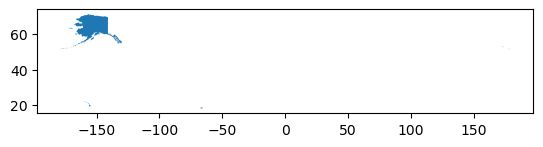

In [11]:
gdf[gdf.STATE.isin(drop_states)].plot()

<AxesSubplot:>

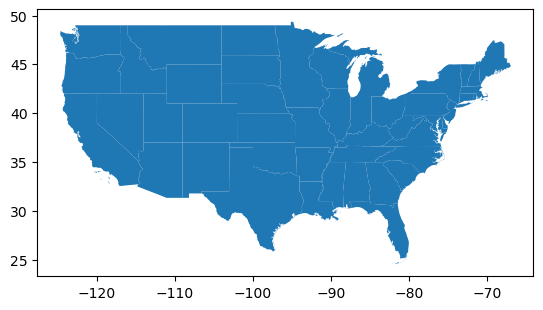

In [13]:
gdf[~gdf.STATE.isin(drop_states)].plot()

In [14]:
gdf = gdf[~gdf.STATE.isin(drop_states)]

In [15]:
gdf.shape

(49, 6)

In [16]:
gdf.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
      dtype='int64')

In [17]:
gdf.reset_index(inplace=True)

In [18]:
gdf.index

RangeIndex(start=0, stop=49, step=1)

In [19]:
gdf.head(49)

index       GEO_ID STATE                  NAME LSAD  CENSUSAREA  \
0       0  0400000US23    23                 Maine        30842.923   
1       1  0400000US25    25         Massachusetts         7800.058   
2       2  0400000US26    26              Michigan        56538.901   
3       3  0400000US30    30               Montana       145545.801   
4       4  0400000US32    32                Nevada       109781.180   
5       5  0400000US34    34            New Jersey         7354.220   
6       6  0400000US36    36              New York        47126.399   
7       7  0400000US37    37        North Carolina        48617.905   
8       8  0400000US39    39                  Ohio        40860.694   
9       9  0400000US42    42          Pennsylvania        44742.703   
10     10  0400000US44    44          Rhode Island         1033.814   
11     11  0400000US47    47             Tennessee        41234.896   
12     12  0400000US48    48                 Texas       261231.711   
13     13  0400000US49    49                  Utah        82169.620   
14     14  0400000US53    53            Washington        66455.521   
15     15  0400000US55    55             Wisconsin        54157.805   
16     17  0400000US24    24              Maryland         9707.241   
17     18  0400000US01    01               Alabama        50645.326   
18     20  0400000US04    04               Arizona       113594.084   
19     21  0400000US05    05              Arkansas        52035.477   
20     22  0400000US06    06            California       155779.220   
21     23  0400000US08    08              Colorado       103641.888   
22     24  0400000US09    09           Connecticut         4842.355   
23     25  0400000US10    10              Delaware         1948.543   
24     26  0400000US11    11  District of Columbia           61.048   
25     27  0400000US12    12               Florida        53624.759   
26     28  0400000US13    13               Georgia        57513.485   
27     30  0400000US16    16                 Idaho        82643.117   
28     31  0400000US17    17              Illinois        55518.930   
29     32  0400000US18    18               Indiana        35826.109   
30     33  0400000US19    19                  Iowa        55857.130   
31     34  0400000US20    20                Kansas        81758.717   
32     35  0400000US21    21              Kentucky        39486.338   
33     36  0400000US22    22             Louisiana        43203.905   
34     37  0400000US27    27             Minnesota        79626.743   
35     38  0400000US28    28           Mississippi        46923.274   
36     39  0400000US29    29              Missouri        68741.522   
37     40  0400000US31    31              Nebraska        76824.171   
38     41  0400000US33    33         New Hampshire         8952.651   
39     42  0400000US35    35            New Mexico       121298.148   
40     43  0400000US38    38          North Dakota        69000.798   
41     44  0400000US40    40              Oklahoma        68594.921   
42     45  0400000US41    41                Oregon        95988.013   
43     46  0400000US45    45        South Carolina        30060.696   
44     47  0400000US46    46          South Dakota        75811.000   
45     48  0400000US50    50               Vermont         9216.657   
46     49  0400000US51    51              Virginia        39490.086   
47     50  0400000US54    54         West Virginia        24038.210   
48     51  0400000US56    56               Wyoming        97093.141   

                                             geometry  
0   MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...  
1   MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...  
2   MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...  
3   POLYGON ((-104.05770 44.99743, -104.25015 44.9...  
4   POLYGON ((-114.05060 37.00040, -114.04999 36.9...  
5   POLYGON ((-75.52684 39.65571, -75.52634 39.656...  
6   MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...  
7   M

## Centroids and geometry

In [20]:
gdf.centroid

/tmp/ipykernel_3120570/2017122361.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid


0      POINT (-69.22532 45.36948)
1      POINT (-71.79546 42.25229)
2      POINT (-85.43751 44.35323)
3     POINT (-109.64507 47.03355)
4     POINT (-116.65540 39.35646)
5      POINT (-74.66099 40.18393)
6      POINT (-75.50198 42.93930)
7      POINT (-79.35542 35.53980)
8      POINT (-82.79018 40.29333)
9      POINT (-77.79953 40.87382)
10     POINT (-71.55250 41.67619)
11     POINT (-86.34329 35.84299)
12     POINT (-99.35528 31.49051)
13    POINT (-111.67820 39.32379)
14    POINT (-120.45017 47.38108)
15     POINT (-90.01113 44.63829)
16     POINT (-76.76446 39.03041)
17     POINT (-86.82843 32.78969)
18    POINT (-111.66458 34.29326)
19     POINT (-92.43928 34.89974)
20    POINT (-119.61077 37.24612)
21    POINT (-105.54782 38.99855)
22     POINT (-72.72576 41.62055)
23     POINT (-75.50018 38.99178)
24     POINT (-77.01630 38.90473)
25     POINT (-82.50162 28.64096)
26     POINT (-83.44606 32.64908)
27    POINT (-114.65933 44.38912)
28     POINT (-89.19828 40.06474)
29     POINT (

In [21]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

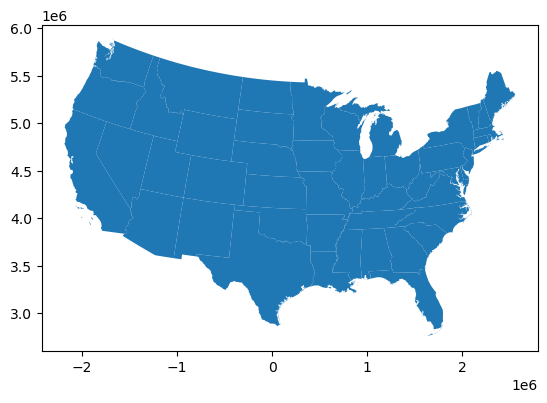

In [22]:
gdf.to_crs(gdf.estimate_utm_crs()).plot()

In [23]:
gdf = gdf.to_crs(gdf.estimate_utm_crs())

In [24]:
gdf.centroid

0      POINT (2359392.452 5305169.775)
1      POINT (2253174.905 4901469.336)
2      POINT (1108124.800 4935453.192)
3      POINT (-765955.563 5348067.290)
4     POINT (-1548246.254 4630302.336)
5      POINT (2065285.016 4612318.097)
6      POINT (1930049.196 4904992.641)
7      POINT (1742974.165 4021487.098)
8      POINT (1368634.294 4510266.503)
9      POINT (1784134.621 4638257.315)
10     POINT (2289313.142 4842131.086)
11     POINT (1102080.849 3988935.477)
12     POINT (-103892.519 3500028.226)
13    POINT (-1115997.209 4520861.031)
14    POINT (-1565541.918 5625943.989)
15      POINT (738620.228 4945674.977)
16     POINT (1910429.070 4447760.368)
17     POINT (1078425.172 3643488.570)
18    POINT (-1230212.721 3954699.221)
19      POINT (550933.347 3861451.888)
20    POINT (-1870826.275 4466915.330)
21     POINT (-590190.342 4392344.096)
22     POINT (2192677.610 4811150.640)
23     POINT (2020359.310 4464239.060)
24     POINT (1889584.643 4429716.358)
25     POINT (1535090.511

In [25]:
gdf.crs

<Projected CRS: EPSG:32615>
Name: WGS 84 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°W and 90°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Ontario. Ecuador -Galapagos. Guatemala. Mexico. United States (USA).
- bounds: (-96.0, 0.0, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdf['centroid'] = gdf.centroid

In [27]:
gdf.head()

index       GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0      0  0400000US23    23          Maine        30842.923   
1      1  0400000US25    25  Massachusetts         7800.058   
2      2  0400000US26    26       Michigan        56538.901   
3      3  0400000US30    30        Montana       145545.801   
4      4  0400000US32    32         Nevada       109781.180   

                                            geometry  \
0  MULTIPOLYGON (((2516172.424 5253443.650, 25164...   
1  MULTIPOLYGON (((2351724.597 4850457.653, 23526...   
2  MULTIPOLYGON (((821167.988 5338182.388, 821794...   
3  POLYGON ((-371533.418 5042503.702, -386687.255...   
4  POLYGON ((-1384104.733 4308747.816, -1385163.9...   

                           centroid  
0   POINT (2359392.452 5305169.775)  
1   POINT (2253174.905 4901469.336)  
2   POINT (1108124.800 4935453.192)  
3   POINT (-765955.563 5348067.290)  
4  POINT (-1548246.254 4630302.336)

<AxesSubplot:>

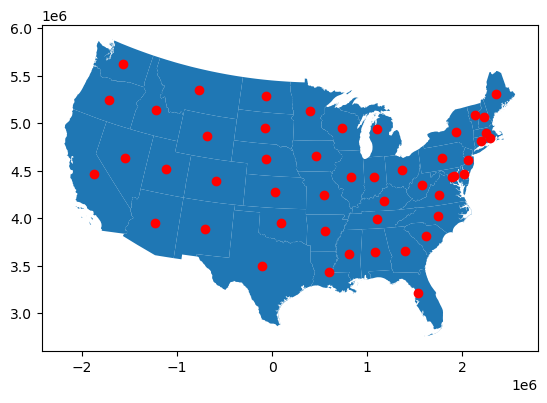

In [28]:
base = gdf.plot()
gdf.centroid.plot(ax=base, color='r')

## Geometry Attribute


In [29]:
gdf.geometry

0     MULTIPOLYGON (((2516172.424 5253443.650, 25164...
1     MULTIPOLYGON (((2351724.597 4850457.653, 23526...
2     MULTIPOLYGON (((821167.988 5338182.388, 821794...
3     POLYGON ((-371533.418 5042503.702, -386687.255...
4     POLYGON ((-1384104.733 4308747.816, -1385163.9...
5     POLYGON ((2003056.105 4538350.496, 2003083.601...
6     MULTIPOLYGON (((2267648.358 4790204.443, 22689...
7     MULTIPOLYGON (((1438177.023 4038770.483, 14383...
8     MULTIPOLYGON (((1347764.520 4669512.453, 13480...
9     POLYGON ((2009412.336 4556637.291, 2008122.809...
10    MULTIPOLYGON (((2312801.421 4845029.912, 23131...
11    POLYGON ((1514737.024 4109398.060, 1514537.561...
12    MULTIPOLYGON (((92911.351 3092597.856, 92990.0...
13    POLYGON ((-1384104.733 4308747.816, -1381904.7...
14    MULTIPOLYGON (((-1682205.672 5879501.588, -167...
15    MULTIPOLYGON (((693374.944 5210974.031, 693159...
16    MULTIPOLYGON (((1987068.430 4366526.262, 19890...
17    MULTIPOLYGON (((1264668.058 3457276.553, 1

<AxesSubplot:>

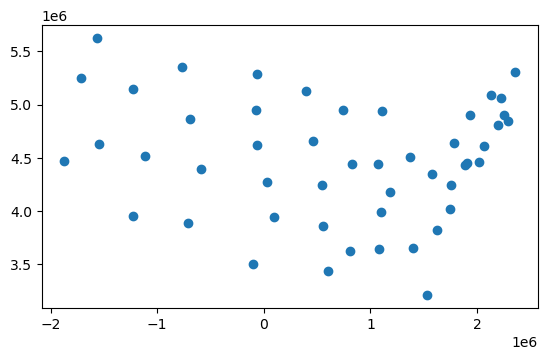

In [28]:
gdf.set_geometry('centroid').plot()

<AxesSubplot:>

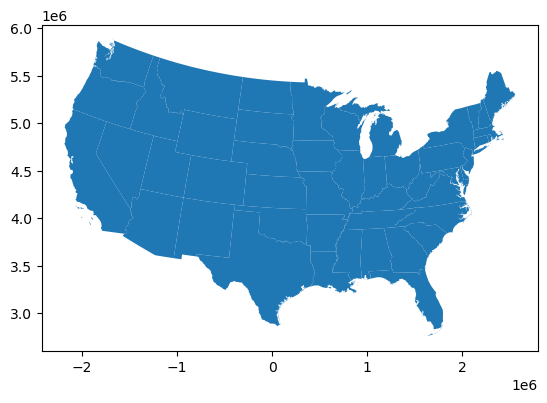

In [30]:
gdf.plot()

In [31]:
gdf = gdf.set_geometry('centroid')

<AxesSubplot:>

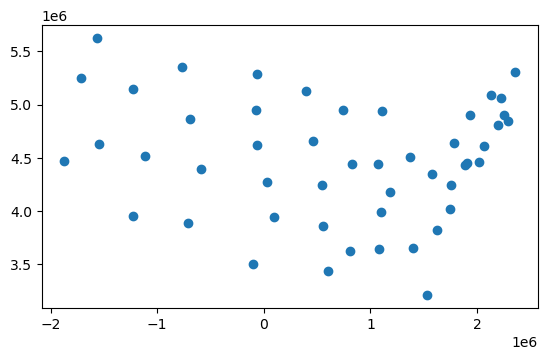

In [32]:
gdf.plot()

<AxesSubplot:>

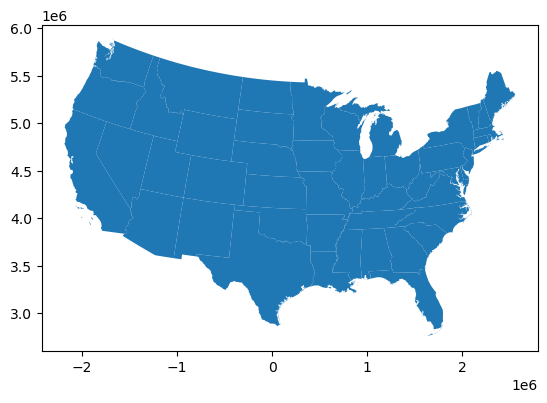

In [33]:
gdf = gdf.set_geometry('geometry')
gdf.plot()

## Basic Spatial Queries and Operations

### Centroid of the lower 49


In [34]:
gdf['dissolve_var'] = 1 # all observations have same value for this variable
us = gdf.dissolve(by='dissolve_var')


<AxesSubplot:>

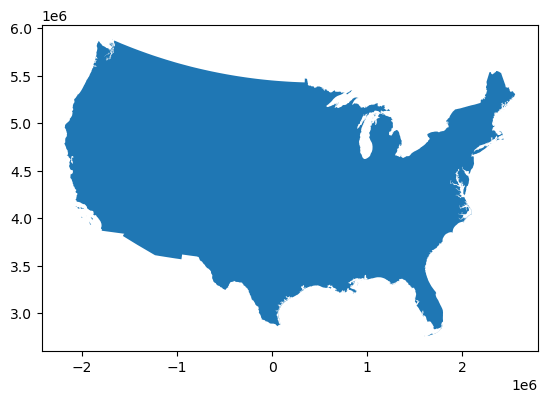

In [35]:
us.plot()

In [36]:
us.head()

geometry  index  \
dissolve_var                                                             
1             MULTIPOLYGON (((-1922552.872 3962305.133, -192...      0   

                   GEO_ID STATE   NAME LSAD  CENSUSAREA  \
dissolve_var                                              
1             0400000US23    23  Maine        30842.923   

                                     centroid  
dissolve_var                                   
1             POINT (2359392.452 5305169.775)

<AxesSubplot:>

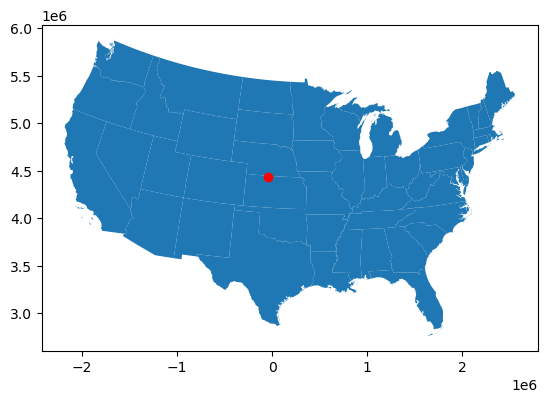

In [37]:
us_cent = us.centroid
base = gdf.plot()
us_cent.plot(ax=base, color='r')

## Which states are within 500 miles (804.672 kilometers) of the centroid?

<AxesSubplot:>

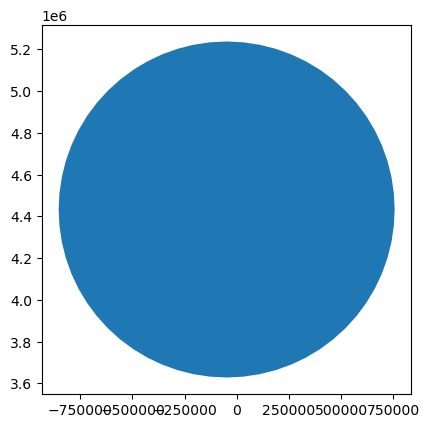

In [38]:
buffer = us_cent.buffer(804.672*1000)
buffer.plot()

<AxesSubplot:>

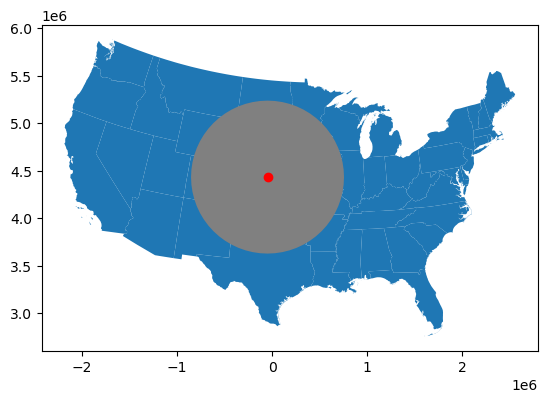

In [39]:
base = gdf.plot()
buffer.plot(ax=base, color='grey')
us_cent.plot(ax=base, color='r')

<AxesSubplot:>

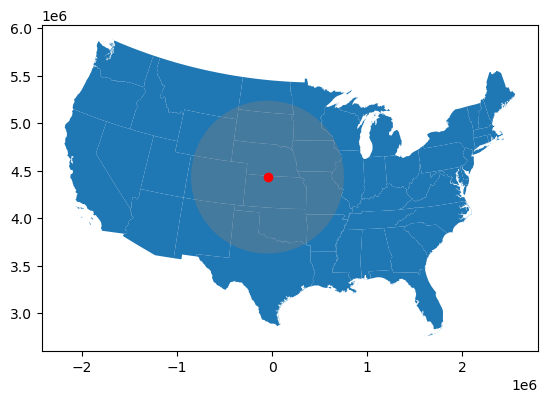

In [40]:
base = gdf.plot()
buffer.plot(ax=base, color='grey', alpha=0.4)
us_cent.plot(ax=base, color='r')

In [40]:
gdf.sindex.query(buffer, predicate='intersects')

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19, 36, 12, 39, 41, 31, 21, 37, 28, 30, 15, 34, 48, 44, 40,  3]])

In [42]:
rfirst, states_intersecting = gdf.sindex.query(buffer, predicate='intersects')

<AxesSubplot:>

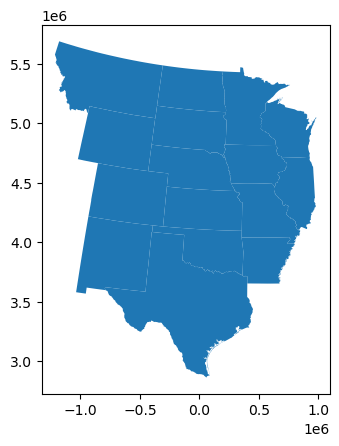

In [43]:
gdf.iloc[states_intersecting].plot()

<AxesSubplot:>

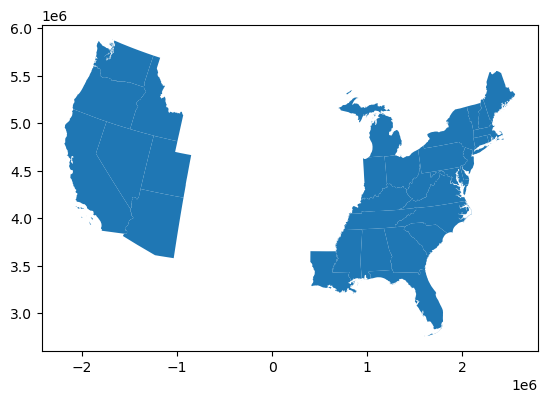

In [44]:
gdf[~gdf.index.isin(states_intersecting)].plot()

### Which states are on the border of the lower 48?

In [47]:
us.envelope

dissolve_var
1    POLYGON ((-2186034.766 2758545.507, 2557956.87...
dtype: geometry

<AxesSubplot:>

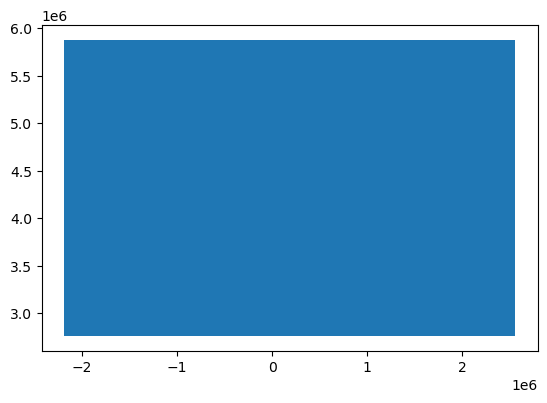

In [48]:
bb = us.envelope
bb.plot()

<AxesSubplot:>

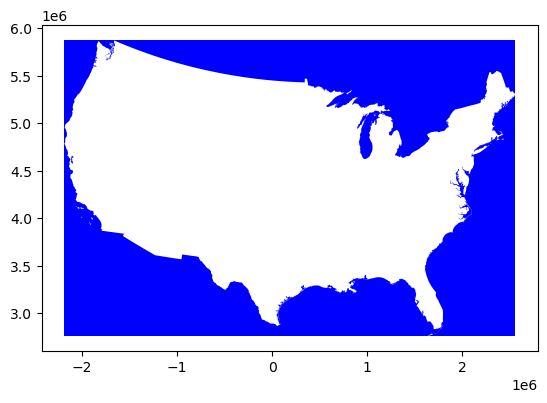

In [49]:
base = bb.plot(color='b')
us.plot(ax=base, color='w') # 2 layers

<AxesSubplot:>

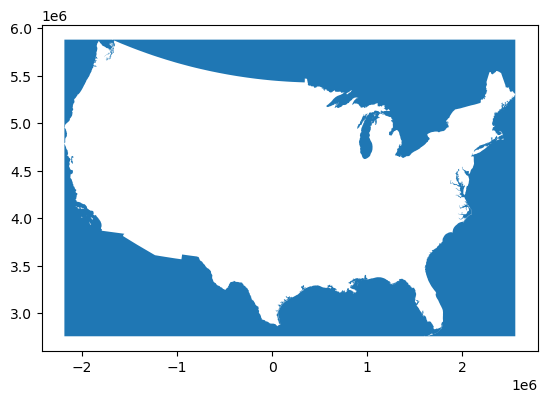

In [50]:
bb_less_49 = bb.difference(us.geometry) # 1 layer
bb_less_49.plot()

In [48]:
gdf.sindex.query(bb_less_49, predicate='touches')

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [25, 33, 35, 17, 26, 43, 12, 39, 18, 20,  7, 46, 16, 23,  5,  9,
        22, 10, 28, 29,  8, 15,  2, 34,  1,  6, 45, 38,  0, 27, 42, 40,
         3, 14]])

<AxesSubplot:>

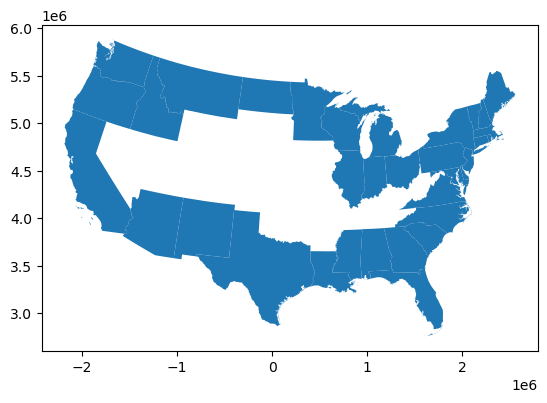

In [51]:
_,border_states = gdf.sindex.query(bb_less_49, predicate='touches')
gdf[gdf.index.isin(border_states)].plot()

### Creating new attributes


In [53]:
import numpy as np

border_dummy = np.zeros(49, 'int')
border_dummy[border_states]=1
border_dummy

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0])

<AxesSubplot:>

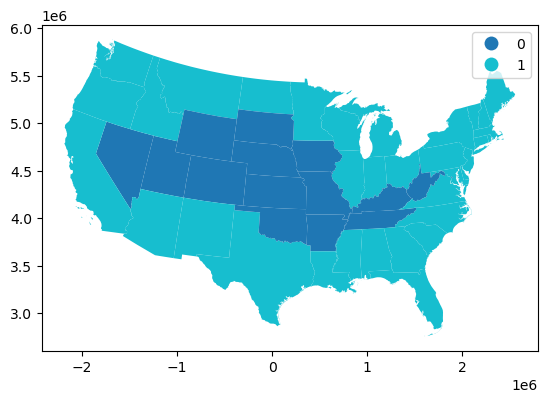

In [55]:
gdf['border'] = border_dummy
gdf.plot(column='border', categorical=True, legend=True)

In [59]:
gdf.explore(column='border', categorical=True, legend=False)

In [60]:
gdf.explore()

In [62]:
gdf.explore(column='border', categorical=True)

In [58]:
gdf.explore?

Signature: gdf.explore(*args, **kwargs)
Docstring:
Interactive map based on GeoPandas and folium/leaflet.js

Generate an interactive leaflet map based on :class:`~geopandas.GeoDataFrame`

Parameters
----------
column : str, np.array, pd.Series (default None)
    The name of the dataframe column, :class:`numpy.array`,
    or :class:`pandas.Series` to be plotted. If :class:`numpy.array` or
    :class:`pandas.Series` are used then it must have same length as dataframe.
cmap : str, matplotlib.Colormap, branca.colormap or function (default None)
    The name of a colormap recognized by ``matplotlib``, a list-like of colors,
    :class:`matplotlib.colors.Colormap`, a :class:`branca.colormap.ColorMap` or
    function that returns a named color or hex based on the column
    value, e.g.::

        def my_colormap(value):  # scalar value defined in 'column'
            if value > 1:
                return "green"
            return "red"

color : str, array-like (default None)
    Named color o